In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
bills = pd.read_csv("All_sponsors_data.csv")
members = pd.read_csv("unique_members.csv")


In [88]:
bills

,bioguideid,congress,introducedDate,actionDate,text,number,policyArea,title,type,url
0,S000094,107,2001-08-02,2001-08-16,Referred to the Subcommittee on Energy and Air...,2814.0,{'name': 'Energy'},Interstate Transmission Act,HR,https://api.congress.gov/v3/bill/107/hr/2814?f...
1,S000094,107,2001-06-12,2001-06-18,"Referred to the Subcommittee on Commerce, Trad...",2135.0,{'name': 'Commerce'},Consumer Privacy Protection Act,HR,https://api.congress.gov/v3/bill/107/hr/2135?f...
2,S000094,107,2001-06-12,2001-07-09,Referred to the Subcommittee on Government Eff...,2136.0,{'name': 'Government Operations and Politics'},Confidential Information Protection Act,HR,https://api.congress.gov/v3/bill/107/hr/2136?f...
3,S000094,107,2001-05-14,2001-06-11,Referred to the Subcommittee on International ...,1828.0,{'name': 'International Affairs'},Unilateral Sanction Reporting Act,HR,https://api.congress.gov/v3/bill/107/hr/1828?f...
4,S000094,107,2001-03-20,2001-04-02,Referred to the Subcommittee on Environment an...,70.0,{'name': 'International Affairs'},Expressing the sense of the Congress that the ...,HCONRES,https://api.congress.gov/v3/bill/107/hconres/7...
...,...,...,...,...,...,...,...,...,...,...
321572,M001147,108,2003-10-01,2003-10-22,Referred to the Subcommittee on the Constitution.,71.0,{'name': 'Government Operations and Politics'},Proposing an amendment to the Constitution of ...,HJRES,https://api.congress.gov/v3/bill/108/hjres/71?...
321573,M001147,108,2004-07-22,2004-11-16,Motion to reconsider laid on the table Agreed ...,750.0,{'name': 'Commemorations'},Recognizing the 130th anniversary of the creat...,HRES,https://api.congress.gov/v3/bill/108/hres/750?...
321574,M001147,108,2003-10-16,2003-10-20,Motion to reconsider laid on the table Agreed ...,400.0,{'name': 'International Affairs'},Honoring the 25th anniversary of Pope John Pau...,HRES,https://api.congress.gov/v3/bill/108/hres/400?...
321575,M001147,108,2003-02-25,2003-05-21,The title of the measure was amended. Agreed t...,100.0,{'name': 'Commemorations'},Recognizing the 100th anniversary year of the ...,HRES,https://api.congress.gov/v3/bill/108/hres/100?...


In [89]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321577 entries, 0 to 321576
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bioguideid      321577 non-null  object 
 1   congress        321577 non-null  int64  
 2   introducedDate  321577 non-null  object 
 3   actionDate      267985 non-null  object 
 4   text            267985 non-null  object 
 5   number          225625 non-null  float64
 6   policyArea      321577 non-null  object 
 7   title           225625 non-null  object 
 8   type            225625 non-null  object 
 9   url             321577 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 24.5+ MB


In [90]:
bills["number"] = bills["number"].fillna(0)
bills["title"] = bills["title"].fillna("null")
bills["congress"] = bills["congress"].astype("category")
bills["introducedDate"] = pd.to_datetime(bills["introducedDate"])
bills["actionDate"] = pd.to_datetime(bills["actionDate"])
bills["number"] = bills["number"].astype("int")
#bond = bond.rename(columns={ "Year": "Year of Release", "Box Office": "Revenue" })
bills = bills.rename(columns={ "text":"actionText", "number":"billnumber", "type":"billtype"})
members = members.rename(columns= {"bioguideId":"bioguideid"})

In [91]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321577 entries, 0 to 321576
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bioguideid      321577 non-null  object        
 1   congress        321577 non-null  category      
 2   introducedDate  321577 non-null  datetime64[ns]
 3   actionDate      267985 non-null  datetime64[ns]
 4   actionText      267985 non-null  object        
 5   billnumber      321577 non-null  int64         
 6   policyArea      321577 non-null  object        
 7   title           321577 non-null  object        
 8   billtype        225625 non-null  object        
 9   url             321577 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(1), object(6)
memory usage: 22.4+ MB


In [92]:
bills = bills[bills["introducedDate"] > "1999-01-01"]

In [93]:
bills

,bioguideid,congress,introducedDate,actionDate,actionText,billnumber,policyArea,title,billtype,url
0,S000094,107,2001-08-02,2001-08-16,Referred to the Subcommittee on Energy and Air...,2814,{'name': 'Energy'},Interstate Transmission Act,HR,https://api.congress.gov/v3/bill/107/hr/2814?f...
1,S000094,107,2001-06-12,2001-06-18,"Referred to the Subcommittee on Commerce, Trad...",2135,{'name': 'Commerce'},Consumer Privacy Protection Act,HR,https://api.congress.gov/v3/bill/107/hr/2135?f...
2,S000094,107,2001-06-12,2001-07-09,Referred to the Subcommittee on Government Eff...,2136,{'name': 'Government Operations and Politics'},Confidential Information Protection Act,HR,https://api.congress.gov/v3/bill/107/hr/2136?f...
3,S000094,107,2001-05-14,2001-06-11,Referred to the Subcommittee on International ...,1828,{'name': 'International Affairs'},Unilateral Sanction Reporting Act,HR,https://api.congress.gov/v3/bill/107/hr/1828?f...
4,S000094,107,2001-03-20,2001-04-02,Referred to the Subcommittee on Environment an...,70,{'name': 'International Affairs'},Expressing the sense of the Congress that the ...,HCONRES,https://api.congress.gov/v3/bill/107/hconres/7...
...,...,...,...,...,...,...,...,...,...,...
321572,M001147,108,2003-10-01,2003-10-22,Referred to the Subcommittee on the Constitution.,71,{'name': 'Government Operations and Politics'},Proposing an amendment to the Constitution of ...,HJRES,https://api.congress.gov/v3/bill/108/hjres/71?...
321573,M001147,108,2004-07-22,2004-11-16,Motion to reconsider laid on the table Agreed ...,750,{'name': 'Commemorations'},Recognizing the 130th anniversary of the creat...,HRES,https://api.congress.gov/v3/bill/108/hres/750?...
321574,M001147,108,2003-10-16,2003-10-20,Motion to reconsider laid on the table Agreed ...,400,{'name': 'International Affairs'},Honoring the 25th anniversary of Pope John Pau...,HRES,https://api.congress.gov/v3/bill/108/hres/400?...
321575,M001147,108,2003-02-25,2003-05-21,The title of the measure was amended. Agreed t...,100,{'name': 'Commemorations'},Recognizing the 100th anniversary year of the ...,HRES,https://api.congress.gov/v3/bill/108/hres/100?...


In [94]:
bills_by_areas = bills["policyArea"].str.split("'").str.get(3).value_counts()
bills["actionText"].str.split(" ").str.get(0).value_counts()


actionText
Referred      91601
Read          41401
Amendment     12749
On            11652
Placed         5481
              ...  
Homeland          1
hearing           1
Subsequent        1
MOTION            1
Discharged        1
Name: count, Length: 122, dtype: int64

In [105]:
bill_action = bills[bills["actionText"].str.split(" ").str.get(0) == "Became"]
bill_action.head()

,bioguideid,congress,introducedDate,actionDate,actionText,billnumber,policyArea,title,billtype,url
129,K000366,110,2008-06-20,2008-10-13,Became Public Law No: 110-397.,6338,{'name': 'Commemorations'},To designate the facility of the United States...,HR,https://api.congress.gov/v3/bill/110/hr/6338?f...
285,J000288,112,2011-01-20,2011-11-09,Became Public Law No: 112-51.,368,{'name': 'Law'},Removal Clarification Act of 2011,HR,https://api.congress.gov/v3/bill/112/hr/368?fo...
344,J000288,114,2015-07-29,2016-06-13,Became Public Law No: 114-172.,3274,{'name': 'Government Operations and Politics'},To designate the facility of the United States...,HR,https://api.congress.gov/v3/bill/114/hr/3274?f...
359,J000288,111,2010-05-18,2010-06-09,Became Public Law No: 111-190.,5330,{'name': 'Commerce'},To amend the Antitrust Criminal Penalty Enhanc...,HR,https://api.congress.gov/v3/bill/111/hr/5330?f...
371,J000288,111,2009-06-03,2009-06-19,Became Public Law No: 111-30.,2675,{'name': 'Commerce'},Antitrust Criminal Penalty Enhancement and Ref...,HR,https://api.congress.gov/v3/bill/111/hr/2675?f...


In [95]:
bill_passed_by_congress = bill_action.groupby('congress', observed=True).size().to_frame()
bill_passed_by_congress.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 106 to 118
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       13 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [96]:
bills_by_congress = bills.groupby("congress", observed=True)
bills_by_congress.size()

congress
106    16091
107    16372
108    15531
109    19498
110    20870
111    19369
112    17222
113    15657
114    18701
115    18665
116    20209
117    24686
118    21508
dtype: int64

In [97]:
#create manually congress majority 
data = [
    [106, "Republican"],
    [107, "Split"],
    [108,"Republican"],
    [109, "Republican"], 
    [110, "Democratic"],
    [111, "Democratic"],
    [112, "Split"],
    [113, "Split"],
    [114, "Republican"], 
    [115, "Republican"],
    [116, "Split"],
    [117, "Democratic"],
    [118,"Split"]
    ]

majority_by_congress = pd.DataFrame( data, columns=["congress", "majority"])
majority_by_congress

,congress,majority
0,106,Republican
1,107,Split
2,108,Republican
3,109,Republican
4,110,Democratic
5,111,Democratic
6,112,Split
7,113,Split
8,114,Republican
9,115,Republican


In [98]:
seriesintroducdebillcount = bills_by_congress.size()
introducedbillcount = seriesintroducdebillcount.to_frame()
introducedbillcount.info()
#introducdebillcount.plot(kind="bar",width=0.5,figsize=(20,6))

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 106 to 118
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       13 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [99]:
# merge everything
#week1.merge(foods, how="left", on="Food ID")
congress_bills_passed_introduced = bill_passed_by_congress.merge(introducedbillcount, how="left", on="congress")
congress_bills_passed_introduced
congress_bills_passed_introduced.rename(columns={"0_x":"Passed", "0_y":"Introduced"})

,Passed,Introduced
congress,,
106,222,16091
107,382,16372
108,503,15531
109,475,19498
110,451,20870
111,382,19369
112,283,17222
113,294,15657
114,323,18701


<Axes: xlabel='congress'>

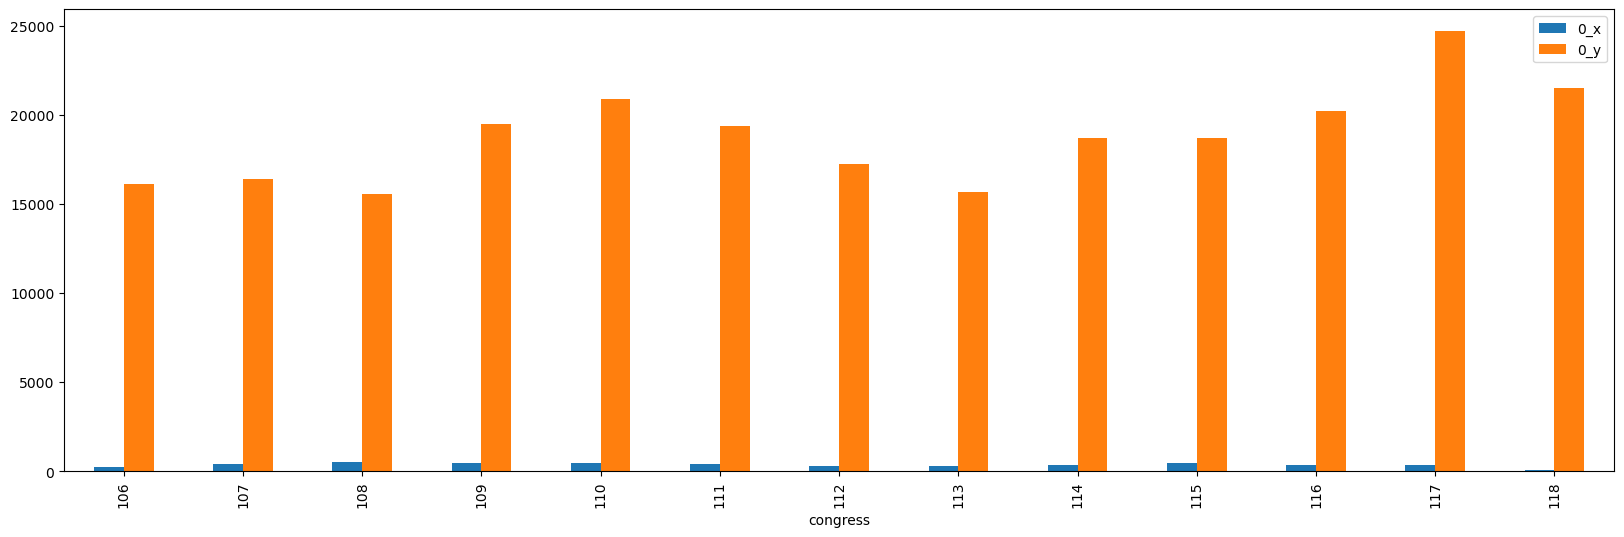

In [100]:
congress_bills_passed_introduced.plot(kind ="bar",width=0.5,figsize=(20,6))

In [101]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bioguideid  2522 non-null   object 
 1   district    2047 non-null   float64
 2   partyName   2522 non-null   object 
 3   state       2522 non-null   object 
 4   chamber     2522 non-null   object 
 5   startYear   2522 non-null   int64  
 6   endYear     2522 non-null   int64  
 7   name        2522 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 157.8+ KB


In [102]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244379 entries, 0 to 321576
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bioguideid      244379 non-null  object        
 1   congress        244379 non-null  category      
 2   introducedDate  244379 non-null  datetime64[ns]
 3   actionDate      201385 non-null  datetime64[ns]
 4   actionText      201385 non-null  object        
 5   billnumber      244379 non-null  int64         
 6   policyArea      244379 non-null  object        
 7   title           244379 non-null  object        
 8   billtype        173143 non-null  object        
 9   url             244379 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(1), object(6)
memory usage: 18.9+ MB


In [103]:
members.head()

,bioguideid,district,partyName,state,chamber,startYear,endYear,name
0,L000604,4.0,Republican,Colorado,House of Representatives,2024,0,"Lopez, Greg"
1,G000579,8.0,Republican,Wisconsin,House of Representatives,2017,2024,"Gallagher, Mike"
2,B001297,4.0,Republican,Colorado,House of Representatives,2015,2024,"Buck, Ken"
3,P000604,10.0,Democratic,New Jersey,House of Representatives,2012,2024,"Payne, Donald M."
4,R000354,2.0,Republican,Arkansas,House of Representatives,1985,1991,"Robinson, Tommy F."


In [104]:
#bills.merge(members, how="left", on="bioguideid")